<h1>IAU fáza 2.</h1>
Maria Fedosenya (50%) a Jakub Grúber (50%)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
from sklearn.preprocessing import FunctionTransformer
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from matplotlib import pyplot
from collections import Counter
from datetime import datetime, date
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, PowerTransformer,QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
pd.options.mode.chained_assignment = None
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

<h2>Načítanie dát z fázy 1</h2>
Originálne dáta sú uložené v priečinku data/origin, dáta upravené v rámci prvej fázy sú v priečinku data/phase_1

In [46]:
sessions_path = "./data/phase_1/session.csv"
users_path = "./data/phase_1/user.csv"
products_path = "./data/phase_1/product.csv"

In [47]:
products = pd.read_csv(products_path)
products.head()

,code,location,store_name,product_ean
0,RU,Europe/Moscow,Kashira,8840337777778
1,SK,Europe/Bratislava,Skalica,9613080891331
2,PH,Asia/Manila,Antipolo,8545276183603
3,PK,Asia/Karachi,Larkana,9999281937499
4,CN,Asia/Shanghai,Hushitai,1423598805373


In [48]:
users = pd.read_csv(users_path)
users.head()

,sex,user_id,current_location,address,job,name,race,mail,username,registration,birthdate,age
0,M,1270.0,"(Decimal('43.6199585'), Decimal('-39.027502'))",Samova 235 750 67 Police nad Metuji,Lawyer,MUDr. Premysl Riha,NaN,stastnyrostislav@seznam.cz,ales00,2023-08-23,1981-08-08,42.0
1,F,146.0,"(Decimal('67.5016935'), Decimal('169.135745'))",Doringstr. 1/8 09217 Stassfurt,Augenoptiker,Verena Zirme,NaN,marinaschueler@aol.de,schweitzertoni,2022-07-02,2010-09-15,13.0
2,NaN,2178.0,"(Decimal('-83.0843785'), Decimal('35.417096'))","Stretto Surian, 1 Appartamento 5 09071, Abbasa...",NaN,Sabatino Salvemini,NaN,alberto76@virgilio.it,rviviani,2017-10-26,1957-07-10,66.0
3,NaN,1211.0,"(Decimal('85.896300'), Decimal('-141.411207'))",Gang Shan Xian Wo Sun Zi Shi Shang Guang Gu 4D...,NaN,Qing Mu Ren,NaN,nishimuraasuka@yahoo.com,fmatsumoto,2020-02-22,1961-03-02,62.0
4,F,1678.0,"(Decimal('71.468916'), Decimal('-69.232181'))",USS Nelson FPO AE 34617,NaN,Vicki Lopez,NaN,ghowell@yahoo.com,nreed,2022-02-14,NaN,NaN


In [49]:
sessions = pd.read_csv(sessions_path)
sessions.head()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,...,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,...,10.65208,0.00646,116.78143,5.44105,2021-05-11 10:16:37,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,...,8.32826,0.07267,134.68835,9.51278,2023-07-07 17:38:03,9.48454,56.71155,30.83474,103955,1186
2,41.66225,800,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,...,10.18567,0.02227,126.47138,8.10733,2019-07-24 12:15:27,9.51528,58.17433,39.30398,731099,1265
3,37.59937,800,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,...,7.75790,0.05988,263.06076,9.31265,2022-06-10 17:52:37,4.91020,68.47422,46.14026,1379903,467
4,62.70254,1920,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,...,7.59956,1.45341,146.88323,12.60862,2020-09-07 15:03:13,10.63283,28.45915,42.41093,691237,594


<h1>Integrácia a čistenie dát</h1>

<h3>Vychýlené hodnoty (outliers detection)</h3>
Najviac podstatných číselných údajov sa nachádza v rámci datasetu sessions. Najprv si prejdeme jednotlive stĺpce a nahradíme vychýlené údaje hraničnými hodnotami rozdelenia - zvolili sme <b>5%</b> a pre dolné ohraničenie a <b>95%</b> pre horné. 
Pre vizualizáciu porovnáme histoploty pred a po čistení. 

In [50]:
columns = ["pct_scroll_move", "pct_mouse_move", "scroll_move_total_rel_distance", "page_activity_duration", "pct_doubleclick", "pct_click", "total_load_time", "mouse_move_total_rel_distance", "pct_mouse_click", "pct_input", "session_duration", "wild_mouse_duration", "pct_scroll_move_duration", "pct_scrandom", "pct_rage_click"]

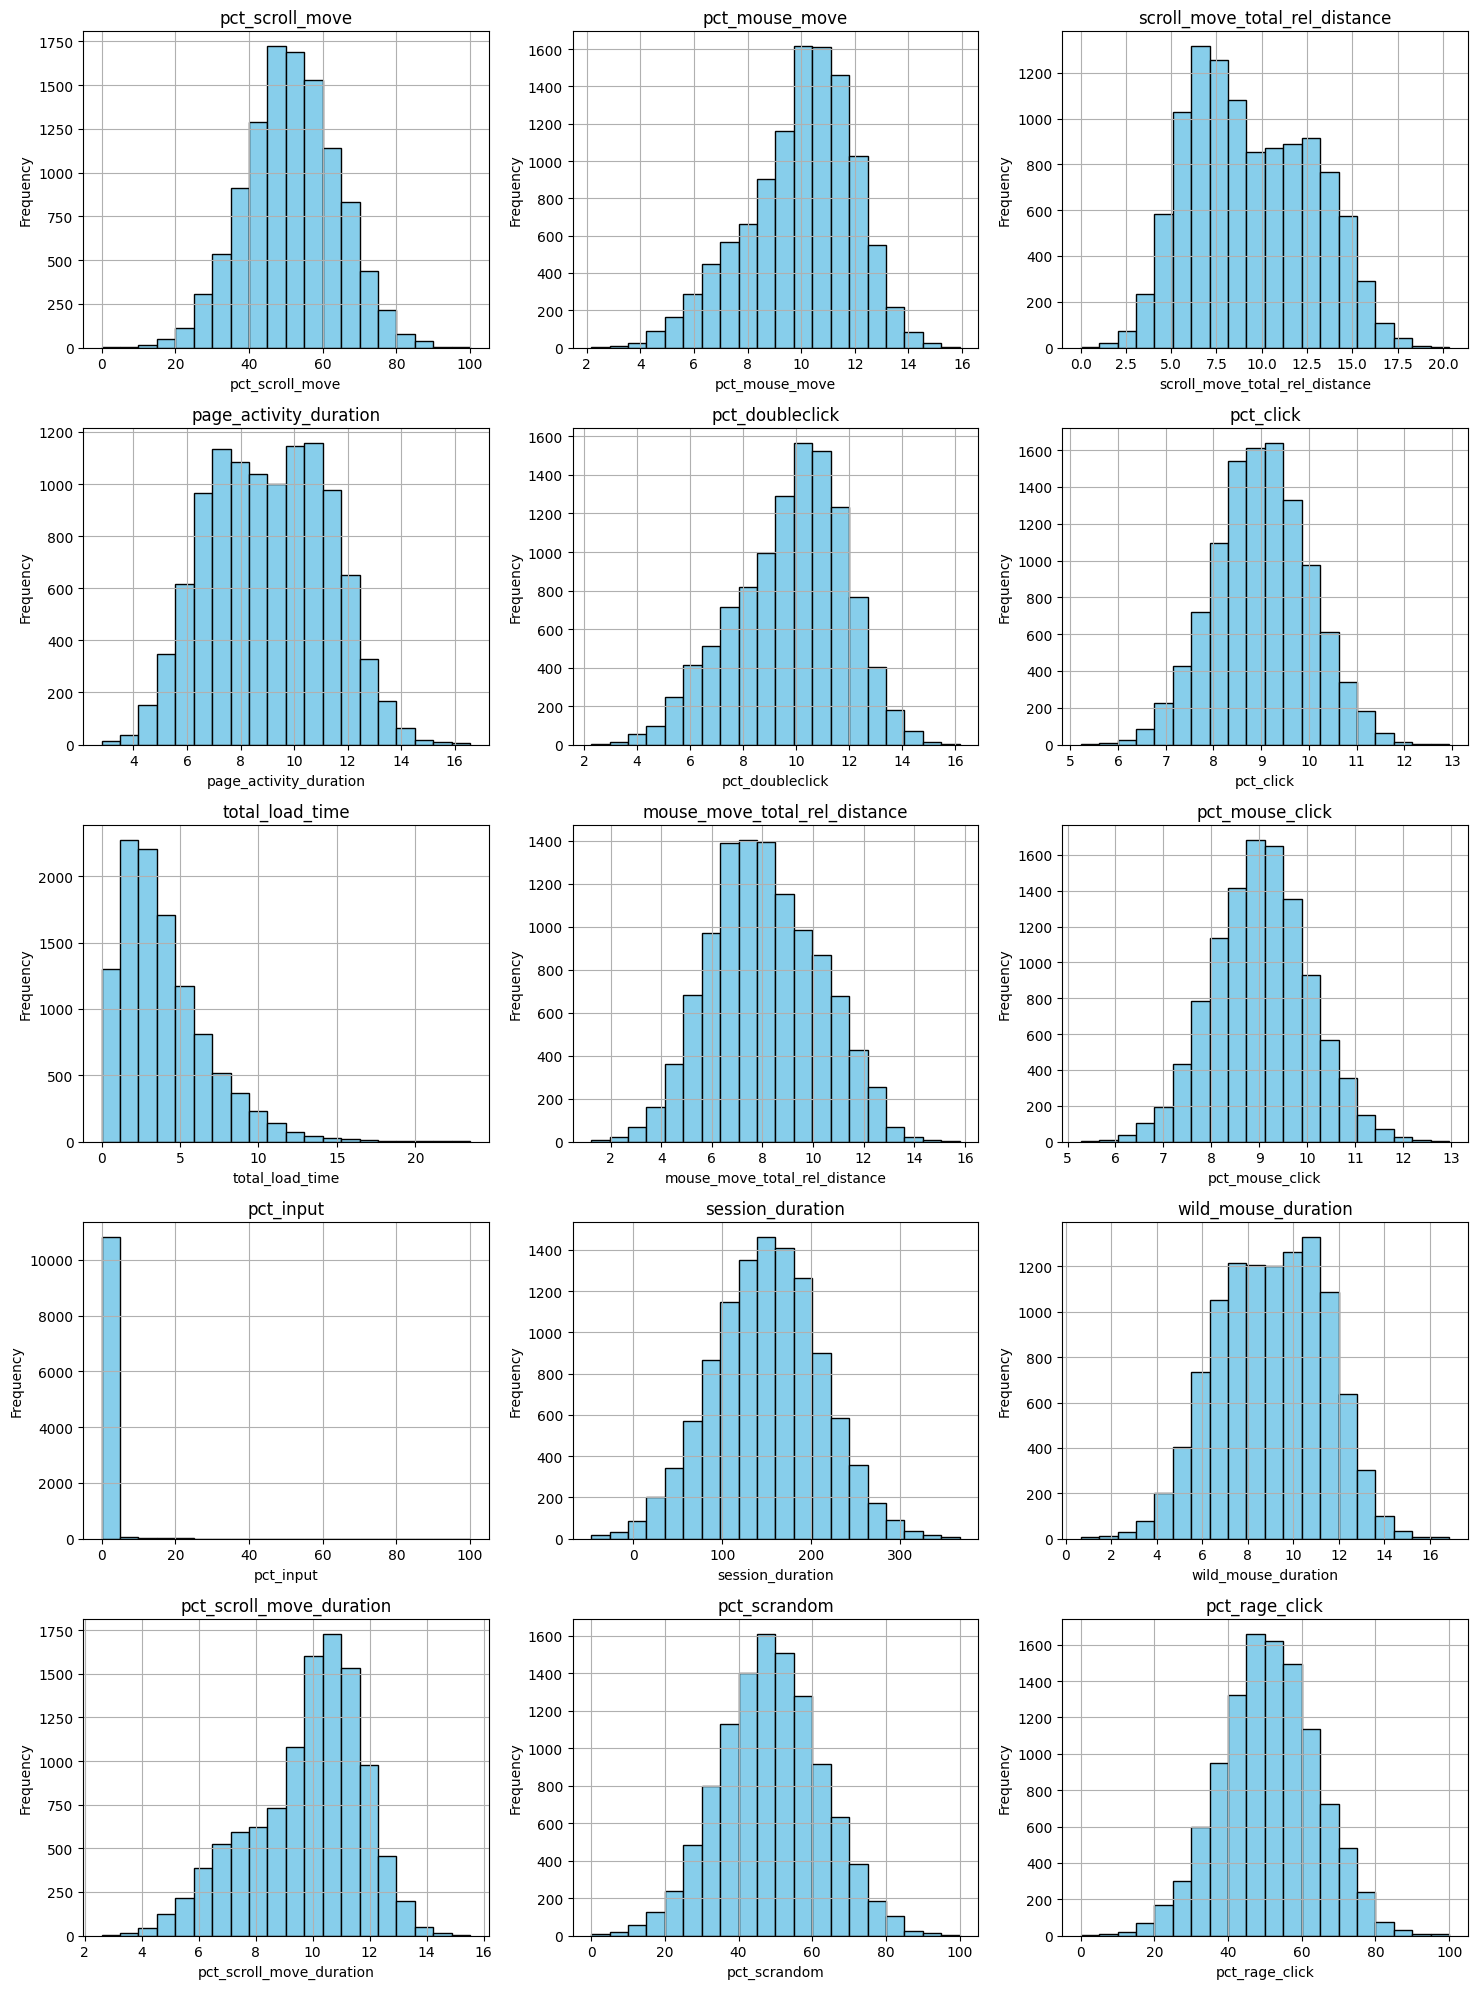

In [51]:
num_rows = 5  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20)) 
axs = axs.flatten()

for i, column_name in enumerate(columns):
    axs[i].hist(sessions[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [52]:
for column in columns:
    lower = sessions[column].quantile(0.05)
    higher = sessions[column].quantile(0.95)

    sessions[column] = sessions[column].apply(lambda x: lower if (x < lower) else higher if (x > higher) else x)

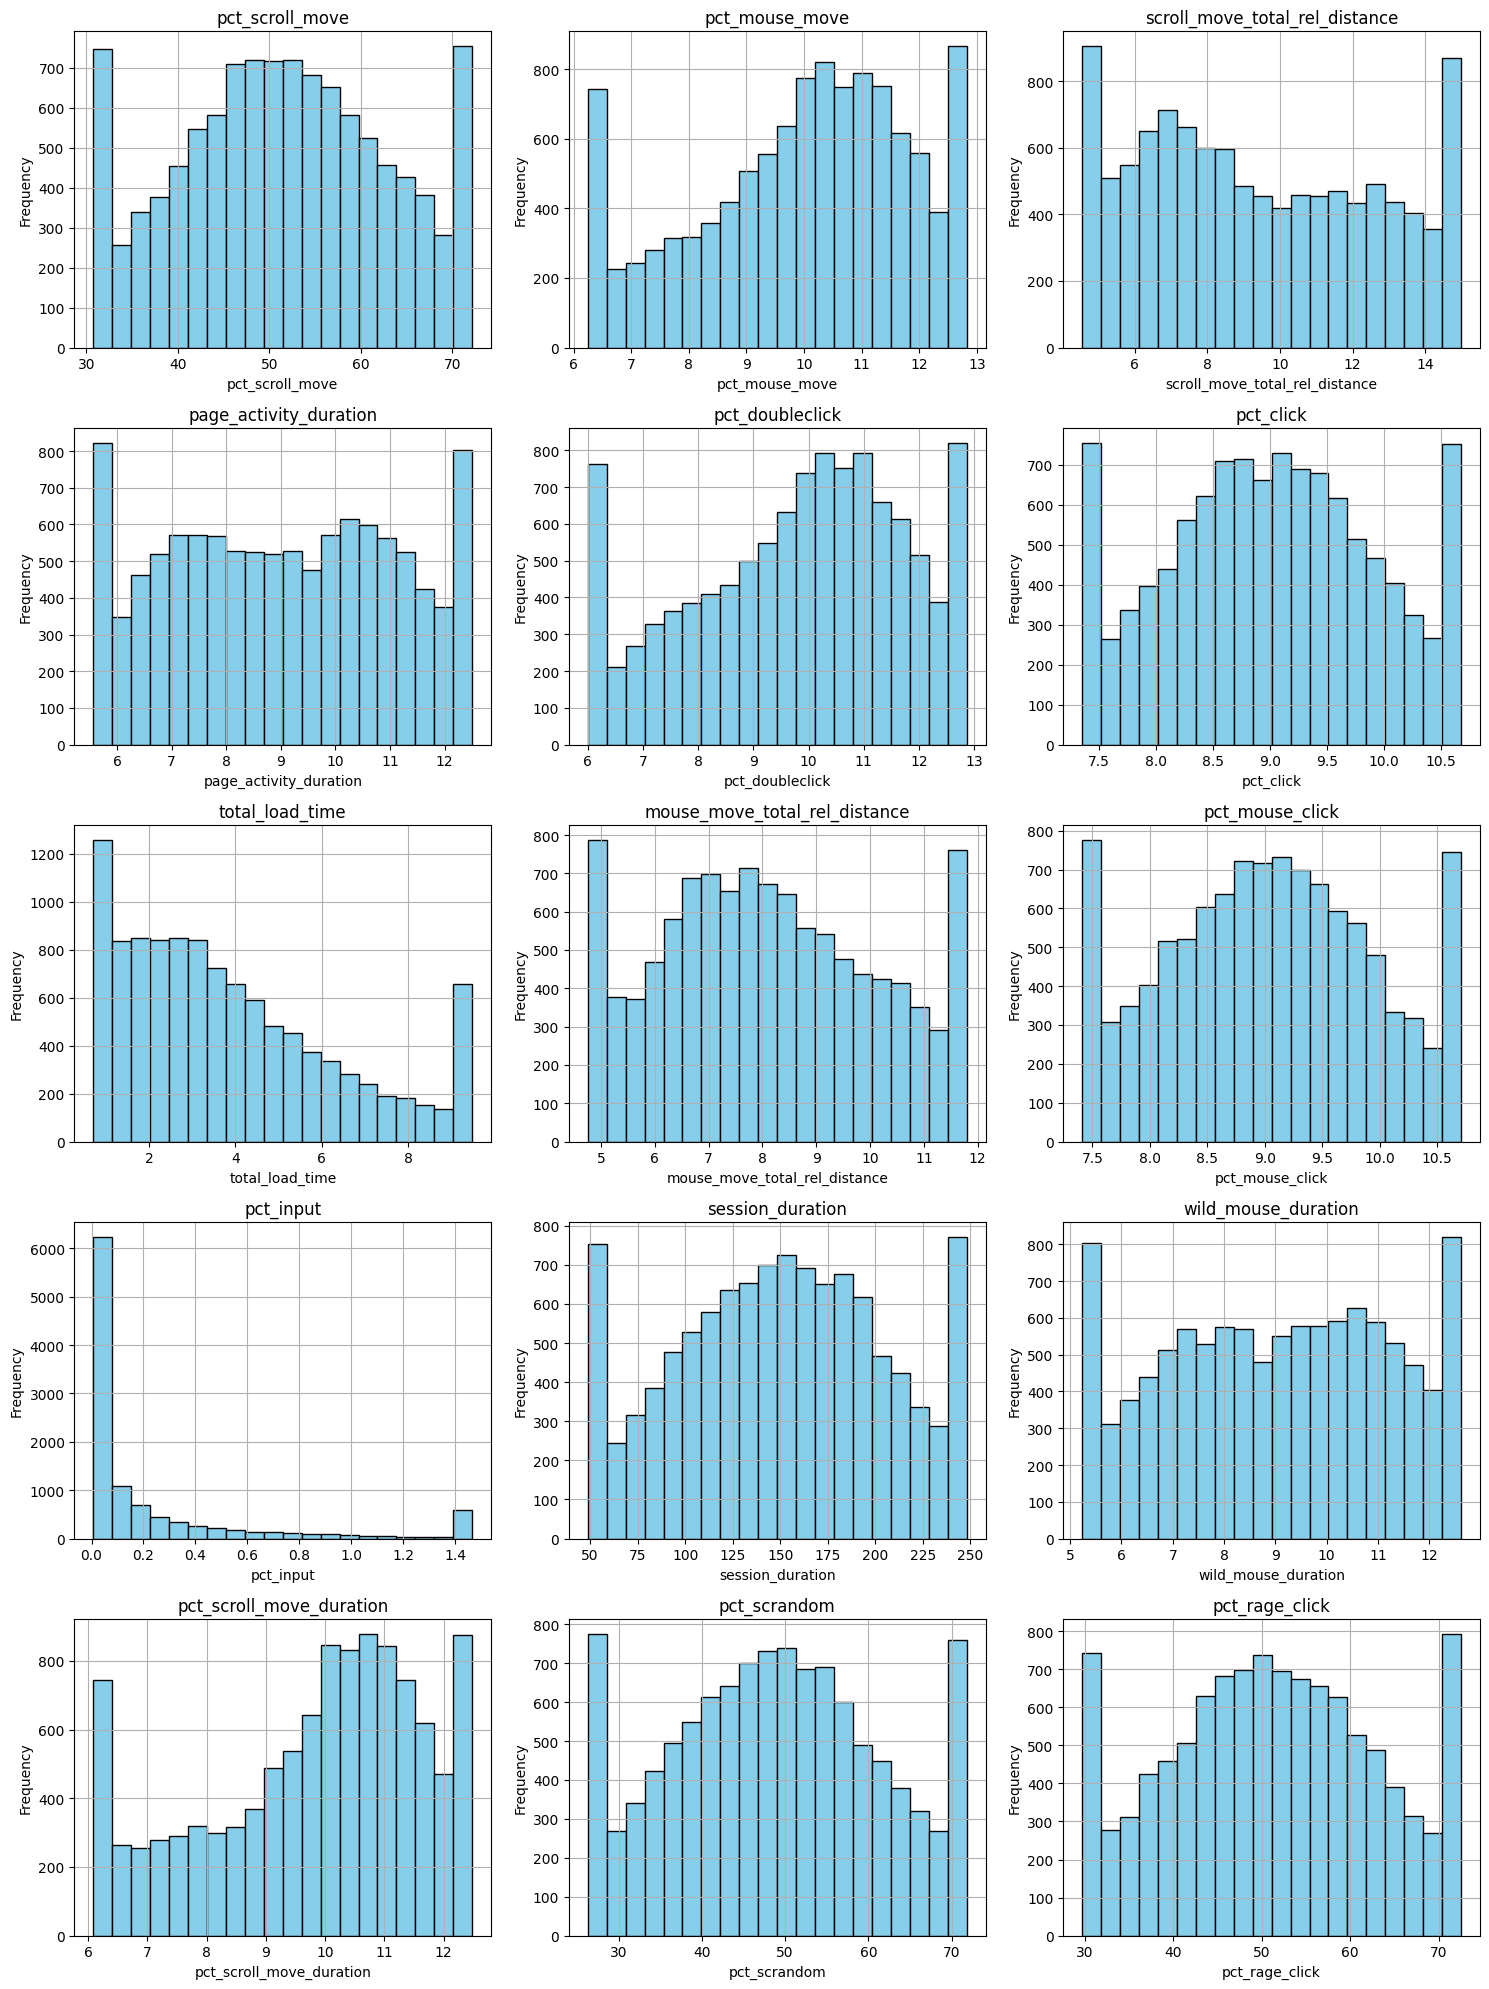

In [54]:
num_rows = 5  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20)) 
axs = axs.flatten()

for i, column_name in enumerate(columns):
    axs[i].hist(sessions[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()